## Correlation and Regression

### Correlation and regression are the most commonly used techniques for investigating relationship between two quantitative variables.

####  Strength of the relationship is quantified by Correlation Coefficient.

#### Relationship in the form of an equation is expressed by the regression.


$R^2$ term is the coefficient of determination and it reflects how well the model fits the observed data.

The coefficient of determination is given by $R^2$ = 1 - $\frac{SSE}{SST}$

* Let y be the observed response.
* $\hat{y}$ be the predicted value for the response
* $\overline{y}$ be the mean of the response

SSE = $\sum_{i=1}^{n}{(y_i - \hat{y}_i)}^2$

SST = $\sum_{i=1}^{n}{(y_i - \overline{y}_i)}^2$

### Example 1

The dataset, *mtcars* is an in-built data set about cars which contains 32 observations and 11 variables. 

https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 

| Sl No | Variable | Description |
| ---- | ---------------- | ------------------------------------- |
| 1 | mpg | Miles/(US) gallon | 
| 2 | cyl | Number of cylinders | 
| 3 | disp | Displacement (cu.in.) |  
| 4 | hp | Gross horsepower  |  
| 5 | drat | Rear axle ratio | 
| 6 | wt | Weight (1000 lbs) | 
| 7 | qsec | 1/4 mile time | 
| 8 | vs | Engine (0 = V-shaped, 1 = straight) | 
| 9 | am | Transmission (0 = automatic, 1 = manual)  | 
| 10 | gear | Number of forward gears  | 
| 11 | carb | Number of carburetors  | 

#### a.	Construct a scatter plot to show the relationship between the variables cars.mpg and cars.wt

#### b.	Measure the relative strength of a linear relationship between the cars.mpg and cars.wt by calculating the sample correlation coefficient

#### c.	Give your inference on the relationship between these variables

#### d.	Give the simple linear regression equation between cars.mpg and cars.wt

#### e. Predict the mpg of the car for wt = 3000 lbs

In [2]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm

In [3]:
cars = sm.datasets.get_rdataset('mtcars').data
print(cars.head(4).T)
print(cars.info())

      Mazda RX4  Mazda RX4 Wag  Datsun 710  Hornet 4 Drive
mpg       21.00         21.000       22.80          21.400
cyl        6.00          6.000        4.00           6.000
disp     160.00        160.000      108.00         258.000
hp       110.00        110.000       93.00         110.000
drat       3.90          3.900        3.85           3.080
wt         2.62          2.875        2.32           3.215
qsec      16.46         17.020       18.61          19.440
vs         0.00          0.000        1.00           1.000
am         1.00          1.000        1.00           0.000
gear       4.00          4.000        4.00           3.000
carb       4.00          4.000        1.00           1.000
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non

#### Answer

a.	Construct a scatter plot to show the relationship between the variables cars.mpg and cars.wt

#### Scatter plots are made using regplot() function of the seaborn library.

#### This plot draws a linear regression fit by default.

####  We provide two input variables, cars.mpg and cars.wt and confidence interval of 95 as size of the confidence interval for the regression estimate.

/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


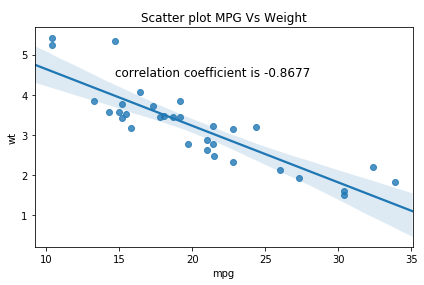

In [4]:
sns.regplot(x=cars.mpg, y=cars.wt, ci = 95)

corcoef = np.corrcoef(cars.mpg, cars.wt)[0,1]

text_cc = '\n\n\n\ncorrelation coefficient is %1.4f'%corcoef
plt.title('Scatter plot MPG Vs Weight')
plt.suptitle(text_cc)
plt.gcf().tight_layout()
# plt.text(15,6.5,text_cc)

plt.show()

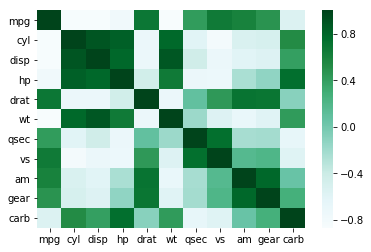

In [5]:
sns.heatmap(cars.corr(), cmap='BuGn')
plt.show()

#### b.	Measure the relative strength of a linear relationship between the cars.mpg and cars.wt by calculating the sample correlation coefficient

Numpy corrcoef() returns the *Pearson product-moment correlation coefficients*.

In [6]:
print('\nCorrelation coefficient between mpg and wt is %1.2f' %np.corrcoef(cars.mpg, cars.wt)[0,1])


Correlation coefficient between mpg and wt is -0.87


#### c.	Give your inference on the relationship between these variables

There is a strong negative linear relationship between miles per gallon and the weight of the car since the correlation coefficient is -87%

#### d.	Give the simple linear regression equation between cars.mpg and cars.wt

There are two main ways to perform linear regression in Python.

https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

* 1) Statsmodels
* 2) scikit-learn

## 1) Use the Linear Regression in Statsmodels.

We use statsmodels.api.OLS() to fit a regression line that would minimize the square of distance from the regression line. 
We try to fit a regression line between an independent variable, mpg and a dependent variable, wt.

Please note that statsmodels does not add a constant by default.

In [7]:
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           1.29e-10
Time:                        14:48:21   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
 # calculate SSE, SSM & SST

SSE   = 0
SST   = 0

for i in range(len(predictions)):
    SSE    += (predictions[i] - y[i])**2

yMean       = np.mean(y)

for i in range(len(predictions)):
    SST    += (y[i] - yMean)**2

print('SSE = %5.4f SST = %5.4f' % (SSE, SST))

Rsq = np.round(1 - (SSE / SST),4)

print("Calculated %s = %1.3f" % ("R squared",Rsq) )     

SSE = 278.3219 SST = 1126.0472
Calculated R squared = 0.753


### Interpretation

#### The coefficient of -5.3445 means that as the wt variable increases by 1 unit, the predicted value of mpg decreases by 5.3445. 

* R squared give the percentage of variance our model explains. Our model explains 75.3% of variation
* Standard error is the standard deviation of the sampling distribution of a statistic such as mean.
* The t scores and p-values for the hypothesis test the wt has statistically significant p-value at 5% level of significance since p-value is less than 5%. 
* There is a 95% confidence intervals for the wt.

** We predict at 95% confidence that the value of wt is between -6.486 and -4.203*

### Regression equation is given below:

#### mpg = 37.2851 - 5.3345 * wt 

#### This model explains 75.3% of variation

#### When wt increases by 1 unit, the mpg decreases by -5.3445.

#### e. Predict the mpg of the car for wt = 3000 lbs

In [9]:
new_X = [ 1, 3.0] # Here we give 1 as the constant for the intercept of model and 3 (in '000s) as the weight 
predictions   = model.predict(new_X)
print('Predicted mpg of the car with weight  %d(000 lbs) is %2.2f' % (3.0, np.round(predictions,3)))

Predicted mpg of the car with weight  3(000 lbs) is 21.25


## 2) Use the Linear Regression in Statsmodels.

In order to use linear regression, we need to import linear_model of SKLearn.

In [10]:
from sklearn import linear_model

#### Fit a model 

In [11]:
X         =  np.array(cars.wt).reshape(-1, 1)
y         =  cars.mpg
lm        =  linear_model.LinearRegression()
model     =  lm.fit(X, y)

### Predict the target variable

In [12]:
predictions = lm.predict(X)

### To get the $R^2$ score of the model, use

In [13]:
print('R square is %1.3f' %lm.score(X, y))

R square is 0.753


### To check the coefficients of the predictors, use

In [14]:
b1 = np.round(lm.coef_,4)
print('Coefficient for wt is %5.4f' %b1)

Coefficient for wt is -5.3445


### To get the intercept

In [15]:
print('Intercept is %5.4f' %lm.intercept_)

Intercept is 37.2851


### t test of significance

* We use the t test to test the null hypothesis that the coefficient of a given predictor variable is zero, implying that a given predictor has no appreciable effect on the target variable.
* An alternative hypothesis is that the predictor does contribute to the target. 

* In testing if $P(T \geq |t|) < \alpha$, then we reject the null hypothesis.

* The t test generally allows us to evaluate the importance of different predictors, assuming that the residauls of the model are normally distributed about zero.

* If $\beta$ is the vector of coefficients of our independent variables and SE is our standard error,
 t statistic = $\frac {\beta_i } {SE_{i,i}}$

In [16]:
import scipy.stats      as     stats
from   sklearn.metrics  import mean_squared_error

In [17]:
XM            = np.matrix(X)
X             = np.array(XM)
print(X.shape)
x            = np.array([row[0] for row in X])

(32, 1)


In [18]:
z            = np.array(np.ones(32))
X            = np.vstack(( x, z ))
X            = np.matrix(X)
print(X)

[[2.62  2.875 2.32  3.215 3.44  3.46  3.57  3.19  3.15  3.44  3.44  4.07
  3.73  3.78  5.25  5.424 5.345 2.2   1.615 1.835 2.465 3.52  3.435 3.84
  3.845 1.935 2.14  1.513 3.17  2.77  3.57  2.78 ]
 [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.    1.    1.    1.    1.    1.   ]]


In [19]:
MSE       =  mean_squared_error(y, predictions)

We calculate the covariance-variance matrix, C

C = cov($\beta$) = $\sigma^2{(XX^T)}^{-1}$

In [20]:
C       = np.linalg.inv(X * X.T)
C      *= MSE 

In [21]:
SE      = np.sqrt(C)
print(SE)

[[0.54134726        nan]
 [       nan 1.81800485]]


/home/edwin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


In [22]:
i       = 0
beta    = lm.coef_
se      = SE[i,i]
t       = np.round(beta / se ,9)
print('t value is %2.9f'% t)

t value is -9.872538343


Once we have a t statistic, we can calculate the p-value 

In [23]:
N    = 32 # Number of observations
P    =  2 # Number of parameters: intercept and 1 slope
dof  = N - P - 1
hp   = stats.t(dof).cdf(t)
p    = hp * 2.0
print('P value is %1.6f '%p)

P value is 0.000000 


###  In class lab : Practice Exercise 1

Redo the example 1, by using the variables, cars.mpg and cars.qsec.

###  In class lab : Practice Exercise 2

Redo the example 1, by using the variables, cars.mpg and cars.disp.

## Residual plots

#### Residual plot is a scatter plot of fitted values against the residuals, with a *locally weighted scatterplot smoothing (lowess)* regression line showing any apparent trend.

#### Using seaborn, residplot() with fitted values as x parameter, and the dependent variable as y.  The argument, lowless = True makes sure the lowess regression line is drawn.




+ *Lowess stands for Locally wighted least sqaures.*
+ *Lowess is a data analysis technique for producing a **Smooth** set of values from a scatter plot with a *noisy* relationship between the two variables.


### Example 2

Construct a residual plot for example 1.

In [24]:
sns.set(style="whitegrid")
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model                 = sm.OLS(y, X).fit() ## OLS(output, input)
cars['predictions']   = model.predict(X)
residuals             = model.resid

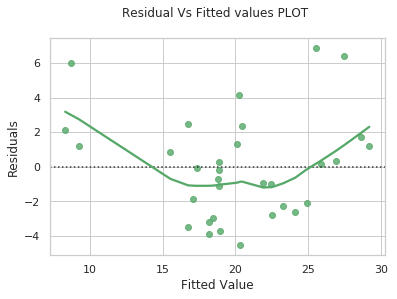

In [25]:
# Plot the residuals after fitting a linear model
ax = sns.residplot(cars.predictions, residuals, lowess = True, color = "g")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

### Draw a histogram of the residuals

/home/edwin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


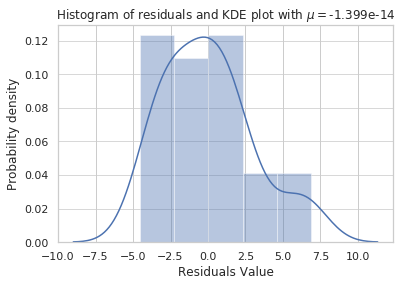

In [26]:
sns.set(style="whitegrid")
sns.distplot(residuals)

plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Residuals Value')
plt.ylabel('Probability density') # It is the probability per unit on the x-axis.

mean     =   residuals.mean()

plt.title('Histogram of residuals and KDE plot with ' + r'$\mu = $' + str(np.round(mean,17)))
plt.show()

### Ideal Plot

We expect the **random errors** to produce residuals that are normally distributed. So, the residuals should fall in a *symmetrical pattern and have a constant spread throughout the range*. 

#### Inference

In the above plot, we can predict non-zero values for the residuals based on the fitted value. For example, values upto 10 and above 25 produce non-zero values for the residuals.

The non-random pattern in the residuals indicates that the predictor variables of the model is not capturing some explanatory information getting into the residuals.

###  In class lab :  Practice Exercise 3

Construct a residual plot for Practice exercise 1.

### Normal QQ Plot 

#### This plot shows how well the distribution of residuals fit the normal distribution.

#### This plots the z score of the residuals against the theoretical normal quantiles. 

#### Any thing quite off the diagonal lines may be a concern for further investigation.

### Example 3

Construct a Normal Q-Q plot for example 1.

In [27]:
from statsmodels.graphics.gofplots import ProbPlot

model_fit_y               = model.fittedvalues
model_residuals           = model.resid # Model residuals


### Normalized residuals
model_normal_residuals    = model.get_influence().resid_studentized_internal 

### absolute squared normalized residuals
model_normal_residuals_abs_sqrt  = np.sqrt(np.abs(model_normal_residuals)) 

### absolute residuals
model_abs_resid                  = np.abs(model_residuals) 

### leverage 
model_leverage                   = model.get_influence().hat_matrix_diag 

### Cook's distance
model_cooks                      = model.get_influence().cooks_distance[0] 

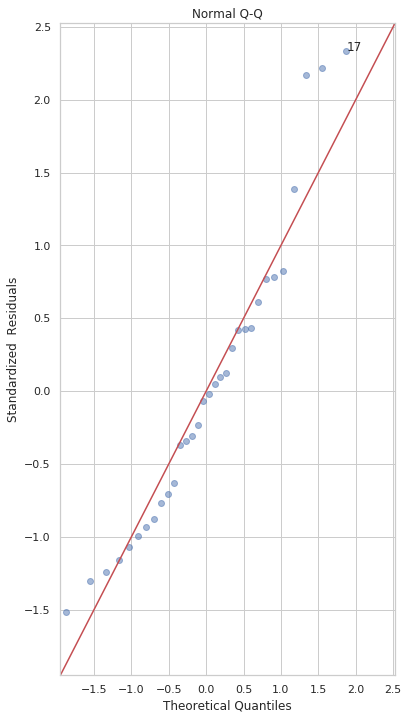

In [28]:
QQ         = ProbPlot(model_normal_residuals)
plot_lm_2  = QQ.qqplot(line = '45', alpha = 0.5, color = '#4C72B0', lw = 1.5)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figheight(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized  Residuals')

# annotations

abs_norm_resid       = np.flip(np.argsort(np.abs(model_normal_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
     plot_lm_2.axes[0].annotate(i, 
            xy = (np.flip(QQ.theoretical_quantiles, 0)[r],
            model_normal_residuals[i]));
     plt.show()

### Inference

There are many deviations from the straight line and hence the residuals do not fit the normal distribution. 

###  In class lab : Practice Exercise 4

Construct a normal Q- Q plot for practice Exercise 1.

### Scale-Location Plot

** This plot shows the spread using which you can assess heteroscedasticity.**

*It is the scatter plot of absolute square-rooted normalized residuals and fitted values, with a lowess regression line.*



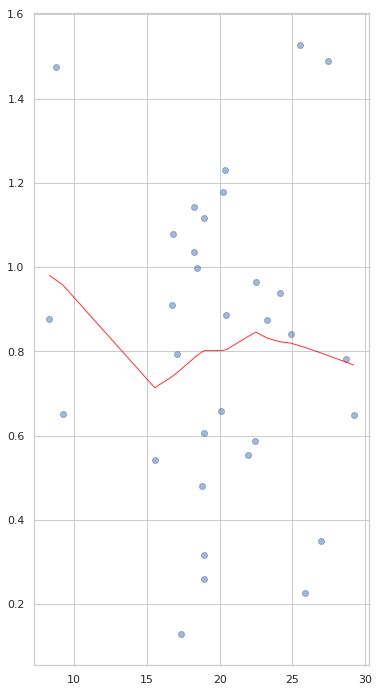

In [29]:
plot_lm_3  = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figheight(12)

plt.scatter(model_fit_y, model_normal_residuals_abs_sqrt, alpha = 0.5)
sns.regplot(model_fit_y, model_normal_residuals_abs_sqrt,
                      scatter   = False,
                      ci             = False,
                      lowess    = True,
                      line_kws = {'color': 'red', 'lw': 1, 'alpha' : 0.8});


In [30]:
plot_lm_3.axes[0].set_title('Scale - Location')
plot_lm_3.axes[0].set_xlabel('Fitted Values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{[|Standardized Residuals|}$');


In [31]:
### annotations
abs_sq_norm_resid = np.flip(np.argsort(np.abs(model_normal_residuals)), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

In [32]:
abs_sq_norm_resid

array([17, 19, 16, 28,  7,  6, 22, 23, 30, 21, 29, 20, 24,  8, 15,  0,  2,
       13, 18,  3, 14, 27, 10, 31,  1, 11,  5, 25,  9,  4, 26, 12])

In [33]:
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_3.axes[0].annotate(i, xy= (model_fit_y[i], model_normal_residuals_abs_sqrt[i]))
    plt.show()

### Inference

Because the residuals spread wider and wider, the red smooth line is not horizontal.

###  In class lab : Practice Exercise 5

Construct a Scale - Location plot for practice Exercise 1.

## A few definitions

**Outliers:** An outlier is an observation with large residual in linear regression. 
It could be because of a data entry error or other problem.

**Leverage:** is a measure of how far an observation deviates from the mean of that variable.
These leverage points can have an effect on the estimate of the regression coefficients.

**Influence:** An observation is said to be influential if removing the observation substantially changes the estimate of coefficients.


## Residuals Vs Leverage plot

#### From statsmodels

* This plot shows if any outliers have influence over the regression fit. 

* Anything outside the group and outside *Cook's Distance* lines, may have an influential effect on model fit.

<Figure size 432x1440 with 0 Axes>

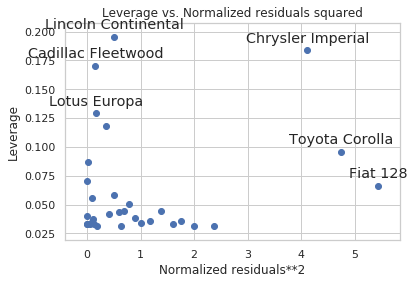

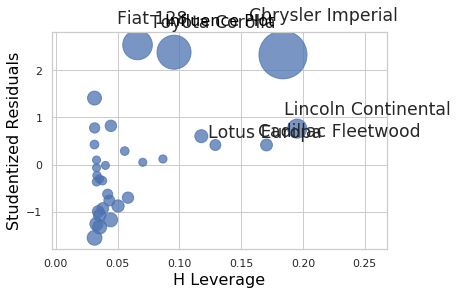

In [34]:
from statsmodels.graphics.regressionplots import *
plot_lm_4  = plt.figure(4)
plot_lm_4.set_figheight(18)
plot_lm_4.set_figheight(20)
plot_leverage_resid2(model)
influence_plot(model)
plt.show()

### Inference

Using residual squared instead of residual itself, the graph is restricted to the first quadrant and the relative positions of data points are preserved. This way we can check potential influential observations and outliers at the same time.

We look for outlying values at the upper right corner or at the lower right corner. These spots are the places where cases can be influential against a regression line. Look for cases outside a dashed line, Cook's distance. When cases are outside of the Cook's distance, the cases are influential to the regression results.

#### Residuals Vs Leverage - coding from the scratch

### Example 4

Construct a Residuals Vs Leverage plot using the data in example 1

https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

In [35]:
sns.set(style="whitegrid")
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model                 = sm.OLS(y, X).fit() ## OLS(output, input)
cars['predictions']   = model.predict(X)
residuals             = model.resid

In [36]:
model_fit_y               = model.fittedvalues
model_residuals           = model.resid # Model residuals

### Normalized residuals
model_normal_residuals    = model.get_influence().resid_studentized_internal 

### leverage 
model_leverage                   = model.get_influence().hat_matrix_diag 

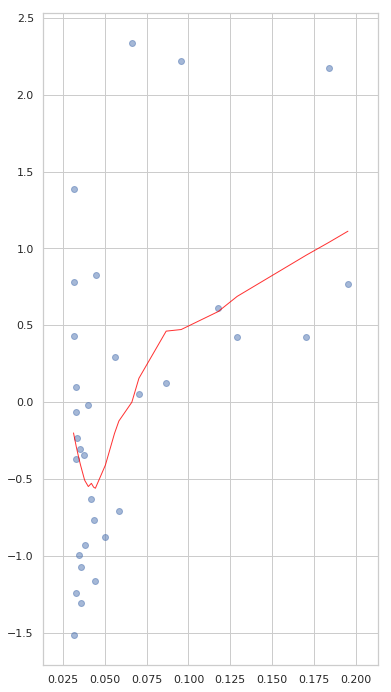

In [37]:
plot_lm_4  = plt.figure(3)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figheight(12)

plt.scatter(model_leverage, model_normal_residuals, alpha = 0.5)
sns.regplot(model_leverage, model_normal_residuals,
                      scatter   = False,
                      ci             = False,
                      lowess    = True,
                      line_kws = {'color': 'red', 'lw': 1, 'alpha' : 0.8});

In [38]:
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals Vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

### annotations
leverage_top_3 =  np.flip(np.argsort(model_cooks),0)[:3]

for i in leverage_top_3:
      plot_lm_4.axes[0].annotate(i,
                                xy = (model_leverage[i],
                                model_normal_residuals[i]))

In [39]:
### Shenanigans for cook's distance contours

def graph(formula, x_range, label = None):
       x = x_range
       y = formula(x)
       plt.plot(x, y, label = label, lw = 1, ls = '--', color = 'red')

In [40]:
p = len(model.params) # numbers of model parameters

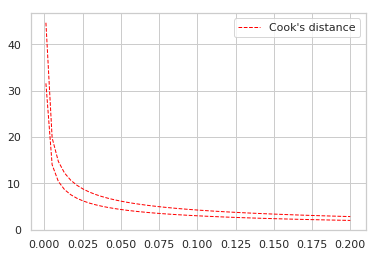

In [41]:
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line

plt.legend(loc='upper right');
plt.show()

#### We find the observation potential influential observation as 16 (Lincoln Continental)

### Increase predictors to the regression model

#### R square is the proportional improvement in prediction from the regression model compared to the mean model and thus indicates the goodness of fit of the model.

* R square can only increase as predictors or independent variables are added to the regression model. 
* The increase is artificial when predictors are not actually improving the model's fit. 
* Adjusted R square incorporates the model's degrees of freedom in such a way that Adjusted R square will decrease as predictors are added if the decrease in model fit does not make up for the loss of degrees of freedom.

https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/


### Example 5

#### Let us try with two predictors for the example 1.

In [42]:
import statsmodels.api   as sm
import scipy.stats       as stats
import matplotlib.pyplot as plt

X  =  cars[["wt", "disp"]]
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model
print(X)

                     const     wt   disp
Mazda RX4              1.0  2.620  160.0
Mazda RX4 Wag          1.0  2.875  160.0
Datsun 710             1.0  2.320  108.0
Hornet 4 Drive         1.0  3.215  258.0
Hornet Sportabout      1.0  3.440  360.0
Valiant                1.0  3.460  225.0
Duster 360             1.0  3.570  360.0
Merc 240D              1.0  3.190  146.7
Merc 230               1.0  3.150  140.8
Merc 280               1.0  3.440  167.6
Merc 280C              1.0  3.440  167.6
Merc 450SE             1.0  4.070  275.8
Merc 450SL             1.0  3.730  275.8
Merc 450SLC            1.0  3.780  275.8
Cadillac Fleetwood     1.0  5.250  472.0
Lincoln Continental    1.0  5.424  460.0
Chrysler Imperial      1.0  5.345  440.0
Fiat 128               1.0  2.200   78.7
Honda Civic            1.0  1.615   75.7
Toyota Corolla         1.0  1.835   71.1
Toyota Corona          1.0  2.465  120.1
Dodge Challenger       1.0  3.520  318.0
AMC Javelin            1.0  3.435  304.0
Camaro Z28      

In [43]:
model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     51.69
Date:                Wed, 30 Jan 2019   Prob (F-statistic):           2.74e-10
Time:                        14:49:33   Log-Likelihood:                -78.084
No. Observations:                  32   AIC:                             162.2
Df Residuals:                      29   BIC:                             166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9606      2.165     16.151      0.000      30.534      39.388
wt            -3.3508      1.164     -2.878      0.007      -5.732      -0.970
disp          -0.0177      0.009     -1.929      0.064      -0.037       0.001
==============================================================================
Omnibus:                        4.079   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                3.665
Skew:                           0.812   Prob(JB):                        0.160
Kurtosis:                       2.666   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### You may observe that both the $R^2$ and Adjusted $R^2$ has increased from what we have seen in exampe 1.
* Regression Model with two predictors  $R^2$ is 0.781 while it is 0.753 with one predictor.
* Regression Model with two predictors  $Adjusted R^2$ is 0.766 while it is 0.745 with one predictor.


### Regression equation is given below:

#### mpg = 34.9606 - 3.3508 * wt  - 0.0177  * disp

#### This model explains 76.6% of variation (using Adj R sq).

#### Other variables remaining constant, when wt increases by 1 unit, the mpg decreases by 3.3508.

#### Other variables remaining constant, when disp increases by 1 unit, the mpg decreases by 0.0177.

####  In class lab : Practice Exercise 6

Try with three predictors for the example 5 by adding one more variable, qsec.
Confirm whether predictors are actually improving the model's fit by comparing R square and Adjusted R square.

### Linear Regression model on Cement data - check VIF

We have 1030 observations on 9 variables.

Estimate the strength (complete comprehensive strength) using the predictor variables given below:

| Sl No | Variable | Description |
| --- | ------------------------ | ---------------------------|
| 1 | cement | Cement in Kg in a m3 mixture |
| 2 | slag | Blast Furnace Slag|
| 3 | ash | Fly Ash |
| 4 | water| Water |
| 5 | superplastic | Superplasticizer |
| 6 | coarseagg | Coarse Aggregate |
| 7 | fineagg | Fine Aggregate |
| 8 | age | Age - Day ( 1 -365) |

In [61]:
import pandas                as     pd
import numpy                 as     np
import scipy.stats           as     stats
import statsmodels.api       as     sm
import statsmodels.stats.api as     sms
from   statsmodels.compat    import lzip
import seaborn               as     sns
import matplotlib.pyplot     as     plt

import pandas as pd

cement_df = pd.read_csv('./data/data/concrete.csv', header = 0)
print(cement_df.shape)
print(cement_df.columns)

(1030, 9)
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


https://www.listendata.com/2018/01/linear-regression-in-python.html

In [62]:
X    = cement_df[["cement", "slag", "ash", "water", "superplastic", "coarseagg","fineagg","age"]]
y    = cement_df.strength

In [63]:
print(X.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28


In [64]:
X       = sm.add_constant(X) # Add an intercept to our model

model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 30 Jan 2019   Prob (F-statistic):          6.29e-206
Time:                        15:13:20   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement           0.1198      0.008     14.113      0.000       0.103       0.136
slag             0.1039      0.010     10.247      0.000       0.084       0.124
ash              0.0879      0.013      6.988      0.000       0.063       0.113
water           -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplastic     0.2922      0.093      3.128      0.002       0.109       0.476
coarseagg        0.0181      0.009      1.926      0.054      -0.000       0.037
fineagg          0.0202      0.011      1.887      0.059      -0.001       0.041
age              0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Detect and remove Outliers

Firstly we try to get the studentized residuals using get_influence( ). 

In [65]:
influence     = model.get_influence()  
resid_student = influence.resid_studentized_external

In [66]:
resid = pd.concat([X, pd.Series(resid_student,name = "Studentized Residuals")],axis = 1)
resid.head()

,const,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,Studentized Residuals
0,1.0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,0.857736
1,1.0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,-0.515967
2,1.0,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,0.267831
3,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,2.523838
4,1.0,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,-0.567012


If the absolute value of studentized residuals is more than 3 then that observation is considered as an outlier and hence should be removed.

In [67]:
ind = resid.loc[np.absolute(resid["Studentized Residuals"]) > 3,:].index
print(ind)

Int64Index([192, 506], dtype='int64')


In [68]:
X  = X [resid['Studentized Residuals'] < 3] # with intercept

### Abscence of Multicollinearity

https://www.listendata.com/2018/01/linear-regression-in-python.html

Multi-collinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.

We can detect multi-collinearity by:
+ By plotting scatter plots between predictor variables to have a visual description of their relationship.
+ By calculating the correlation coefficients between the variables we learn the extent of multi-collinearity in the data.
+ By calculating the Variable Inflation Factor (VIF) for each variable. 
VIF measures how much the variance of an estimated regression coefficients increases if your predictors are correlated.  The higher the value of VIF for the regressor, the more it is highly correlated to other variables.

VIF for a predictor variable is given by $\frac{1}{1 - R^2}$.
Here we take one of the explanatory variables as the target variable and all others as independent variables. So we run a regression between one of those independent variables with remaining independent variables. 


####  Detecting and Removing Multicollinearity 

##### We use the statsmodels library to calculate VIF

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[7.470995663275615,
 7.27922399435575,
 6.171691046112059,
 6.986798451584253,
 2.966729775126993,
 5.055073313722397,
 7.008195354068978,
 1.118448699183081]

### Create a function to remove the collinear variables. 

We choose a threshold of 5 which means if VIF is more than 5 for a particular variable then that variable will be removed.

In [70]:
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)


In [71]:
train_out = calculate_vif(X) 

Iteration no.
1
[6720.486622087176, 7.470995663275615, 7.27922399435575, 6.171691046112059, 6.986798451584253, 2.966729775126993, 5.055073313722397, 7.008195354068978, 1.118448699183081]
Max VIF is for variable no.:
0
Iteration no.
2
[15.411428112935946, 3.3342657581085846, 4.155598615063493, 82.49488340214151, 5.47248933605904, 85.31891255975485, 72.7457058119554, 1.6993804552810714]
Max VIF is for variable no.:
5
Iteration no.
3
[14.459403389463185, 3.304696731533726, 3.96926752195452, 72.20293057684762, 5.398055318529208, 48.64620607932568, 1.6992685093159439]
Max VIF is for variable no.:
3
Iteration no.
4
[9.398248435680163, 2.080626417128508, 2.947311664391803, 2.937369758296057, 14.194212265847629, 1.577226952228047]
Max VIF is for variable no.:
4
Iteration no.
5
[2.815910084082646, 1.5271448218478205, 1.8831376286345198, 2.9193601686224637, 1.5503096086209325]
Max VIF is for variable no.:
3


In [72]:
train_out.head()

,cement,slag,ash,superplastic,age
0,141.3,212.0,0.0,0.0,28
1,168.9,42.2,124.3,10.8,14
2,250.0,0.0,95.7,5.5,28
3,266.0,114.0,0.0,0.0,28
4,154.8,183.4,0.0,9.1,28


In [73]:
[variance_inflation_factor(train_out.values, j) for j in range(1,train_out.shape[1])]

[1.5271448218478205,
 1.8831376286345198,
 2.9193601686224637,
 1.5503096086209325]

### Inference 

We don't see any variable having VIF more than the threshold of 5. Hence there is no multi-collinearity.

### Take home exercises

### Exercise 1

Use the file, **car-mpg.csv** to find the regression equation line for the following:
*   i. Regress mpg on disp (displacement)
*  ii. Regress mpg on hp (horsepower)
* iii. Regress mpg on wt (weight)
*  iv. Regress mpg on acc(acceleration)

Note: For each of the above question, please do the following:

### a.	Construct a scatter plot to show the relationship between the variables

### b.	Measure the relative strength of a linear relationship between the variables

### c.	Give your inference on the relationship between these variables

### d.	Give the simple linear regression equation between  the variables

https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/

In [75]:
import pandas as pd
cars_df = pd.read_csv('./data/data/car-mpg.csv')
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Exercise 2

Use the file, **Advertising.csv** to find the regression equation line for the following:

*   i. Regress Sales on TV
*  ii. Regress Sales on Newspaper
* iii. Regress Sales on Radio

Note: For each of the above question, please do the following:

### a.	Construct a scatter plot to show the relationship between the variables

### b.	Measure the relative strength of a linear relationship between the variables

### c.	Give your inference on the relationship between these variables

### d.	Give the simple linear regression equation between  the variables

In [76]:
import pandas as pd
Advertising_df = pd.read_csv('Advertising.csv', names = ['TV','Radio','Newspaper','Sales'], header = 0)
print(Advertising_df.info())
print(Advertising_df.head().T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB
None
               1     2     3      4      5
TV         230.1  44.5  17.2  151.5  180.8
Radio       37.8  39.3  45.9   41.3   10.8
Newspaper   69.2  45.1  69.3   58.5   58.4
Sales       22.1  10.4   9.3   18.5   12.9


## END